First of all, we should gather the data from the file, presented before and arrange it in a manner, that we are ok to interpret

In [2]:
import numpy as np
def read_data(filename):
    with open(filename, 'r') as r:
        lst = r.readlines()
    data = []
    for x in lst:
        data.append(x.split(' '))
    return np.array(data, dtype=np.float64)
assert read_data("data24.txt").shape==(300L, 14L)
data = read_data("data24.txt")
Y = data[:,13]
X = data[:,0:13]
print X

[[-22.9     3.9   -16.2   ...   0.816 -17.2     5.63 ]
 [  0.571   5.26    5.44  ...  -8.12    5.21    4.49 ]
 [-12.9    -2.38   11.4   ...  18.2    17.9    -3.84 ]
 ...
 [-24.6    11.4     9.84  ... -15.      0.342  11.5  ]
 [ -8.14   14.5    13.    ...   5.69  -11.1    13.4  ]
 [ -8.25   17.7     7.54  ... -19.6    -0.484  17.   ]]


Secondly, we need to calculate correlation and covariance between each variable $X_{i}$ and $Y$

In [4]:
def cov(X, Y):
    '''
    Calculates covariance, returns an array of covariances between X_i and Y
    
    
    Keyword arguments:
    X - an array of X_i
    Y - an array of Y
    '''
    cov = []
    for i in X.T:
        cov.append(np.cov(i, Y)[0][1])
    return np.array(cov)
assert cov(X, Y).shape==(13L,)
print cov(X, Y)
def corr(X, Y):
    '''
    Calculates correlation between X_i and Y, return array of them
    
    
    Keyword arguments:
    X - an array of X_i
    Y - an array of Y
    '''
    corr = []
    for i in X.T:
        corr.append(np.corrcoef(i, Y)[0][1])
    return np.array(corr)
assert corr(X, Y).shape==(13L, )
print corr(X, Y)

[-195.9531847   478.05295928    1.62537485 -189.17040318 -991.29616939
  -55.22065685 -994.21876048 -107.64001321  161.86788416  159.22776018
  -62.05153429 -114.74343426  481.32272635]
[-0.18109076  0.48372845  0.00175271 -0.17712214 -0.89714048 -0.05368896
 -0.88919166 -0.10695506  0.14943162  0.14838057 -0.06116469 -0.11362048
  0.48548252]


As we has no measured covariance and correlation, we are going to calculate the absolute value of correlation for every single $X_{i}$

In [219]:
def abs_corr(X, Y):
    '''
    Calculates the absolute correlation value between X_i and Y
    
    
    Keyword arguments:
    X - an array of X_i
    Y - an array of Y
    '''
    abs_corr = []
    for i in range(X.T.shape[0]):
        abs_corr.append(abs(corr(X, Y)[i]/(np.std(X[:,i])*(np.std(Y)))))
    return np.array(abs_corr)
assert abs_corr(X, Y).shape==(13L,)
print abs_corr(X, Y)

[1.67915325e-04 4.91108345e-04 1.89633990e-06 1.66395879e-04
 8.14643396e-04 5.23743237e-05 7.97919125e-04 1.06629892e-04
 1.38412199e-04 1.38734785e-04 6.04921589e-05 1.12884806e-04
 4.91315986e-04]


Now, we will construct correlation matrix for each $X_{i}$ and $X_{j}$

In [5]:
def corr_matrix(X):
    '''
    Outputs correlation matrix for X_i and X_j, where a_ij represents i, j correlation between X_i and X_j
    
    
    Keyword arguments:
    X - an array of X_i
    '''
    return np.corrcoef(X.T)
assert corr_matrix(X).shape==(13L, 13L)
print corr_matrix(X)

[[ 1.          0.00127089  0.0467664   0.99543384 -0.02184728  0.01790313
  -0.02811257  0.09825995  0.00764607  0.01242708  0.02625521  0.09854991
   0.01003171]
 [ 0.00127089  1.         -0.01597775  0.00625053 -0.12426733 -0.05701641
  -0.1187771  -0.08764857 -0.00605207 -0.00914663 -0.05535499 -0.09876143
   0.99440271]
 [ 0.0467664  -0.01597775  1.          0.0477636  -0.02399658 -0.06952458
  -0.02591803  0.05392059 -0.04784749 -0.04611767 -0.06954197  0.05120161
  -0.02063945]
 [ 0.99543384  0.00625053  0.0477636   1.         -0.02397106  0.01232022
  -0.03139383  0.10107325  0.01475409  0.01960465  0.01976444  0.10098972
   0.01533637]
 [-0.02184728 -0.12426733 -0.02399658 -0.02397106  1.         -0.02395992
   0.99589819  0.0616776  -0.0640756  -0.06535888 -0.01758176  0.0652481
  -0.12599294]
 [ 0.01790313 -0.05701641 -0.06952458  0.01232022 -0.02395992  1.
  -0.03843453 -0.02558593  0.01407753  0.01661446  0.99455808 -0.02373528
  -0.06428192]
 [-0.02811257 -0.1187771  -0.02

Using scikit-learn we will calculate the least-square errors, i.e. the linear regression

In [6]:
from sklearn.linear_model import LinearRegression
X = np.hstack((X, np.ones((300, 1))))
assert X.shape==(300L, 14L)
regressor = LinearRegression(fit_intercept=False)

def train(X, Y, regressor):
    '''
    Inputs X and Y data to train a regressor
    
    
    Keyword arguments:
    X - an array of X_i
    Y - an array of Y
    regressor - an instance of Scikit-learn for a linear regression
    '''
    return regressor.fit(X, Y)

In [7]:
trained_regressor = train(X, Y, regressor)

With built-in scikit-learn features, we can easily get the coefficient for each value of 

In [8]:
print trained_regressor.coef_

[ 2.89117137e-03  8.67160411e-03 -9.25746948e-04 -2.00513372e+00
 -7.99380744e+00  1.12753615e-02 -7.37231333e-03  9.26076938e-02
  9.56608752e-03  9.93967255e-01 -5.12428662e-01  4.13749922e-03
  3.99146335e+00  1.00023348e+01]


Now, we need to compute the variance of the noise. We have $Y = f(X) + \epsilon$. $$Var(Y)=mean((Y-f(X))^2)$$

In [14]:
def variance(X, Y, regressor):
    '''
    Outputs a variance for the noise
    
    
    Keyword arguments:
    X - an array of X_i
    Y - an array of Y
    regressor - an instance of Scikit-learn class to obtain f(X)
    '''
    return np.mean((Y-regressor.predict(X))**2)
variance(X, Y, trained_regressor)

0.06456894746220457

t-value is an intermediate step in calculating the p-value, that actually in machine learning holds the significance of the concrete variable

In [13]:
t_val = trained_regressor.coef_/(np.sqrt(np.var(np.linalg.inv(np.matmul(X.T, X)))))
print t_val

[ 2.24758088e+00  6.74125784e+00 -7.19670639e-01 -1.55878004e+03
 -6.21434240e+03  8.76540467e+00 -5.73119626e+00  7.19927172e+01
  7.43662438e+00  7.72704735e+02 -3.98359253e+02  3.21646937e+00
  3.10294188e+03  7.77576061e+03]


Residual is $Y-Y_{pred}$. Q-Q plot is drawing quantiles-quantiles

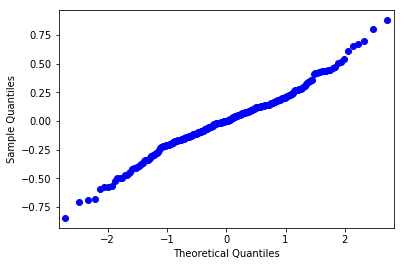

In [197]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
def calculate_residuals(X, Y, regressor):
    '''
    Outputs a vector of residuals, that is Y - Y_pred
    
    
    Keyword arguments:
    X - an array of X_i
    Y - an array of Y
    regressor - an instance of Scikit-learn class to obtain Y_pred
    '''
    return Y - regressor.predict(X)

def show_qq(residuals):
    '''
    Draws QQ-plot for all residuals
    
    
    Keyword arguments:
    residuals - an array of residuals
    '''
    fig = sm.qqplot(Y-trained_regressor.predict(X))
    return plt.show(fig)
show_qq(calculate_residuals(X, Y, trained_regressor)) #Not so good approximation of Normal distribution(best(slope=1, inter=0))

Now, we will draw residuals vs Y graph

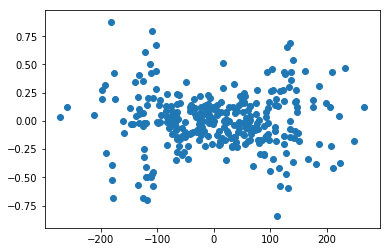

In [198]:
def show_res_vs_y(Y, residuals):
    '''
    Draws residuals vs Y
    
    
    Keyword arguments:
    Y - an array of Y
    residuals - an array of residuals
    '''
    return plt. show(plt. scatter(Y, residuals))
show_res_vs_y(Y, calculate_residuals(X, Y, trained_regressor))

Now, we will calculate $R^2$

In [199]:
from sklearn.metrics import r2_score
def calculate_R2(Y, X, regressor):
    '''
    Outputs the value of the coefficient of the determination
    
    
    Keyword arguments:
    Y - an array of Y
    X - an array of X
    regressor - an instance of Scikit-learn class to obtain Y_pred
    '''
    return r2_score(Y, regressor.predict(X))
calculate_R2(Y, X, trained_regressor)

0.9999937803972268